<a href="https://colab.research.google.com/github/TylerHuynh1/Book-Search/blob/main/3_image_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 3
1. Upload a personal image in hosting place that can be accesed using an URL.
2. Perform filtering using a 3x3 and then a 5x5 box filter. Show the resulting images. What is the effect of applying a box filter. Explain the differences between the two resulting images.


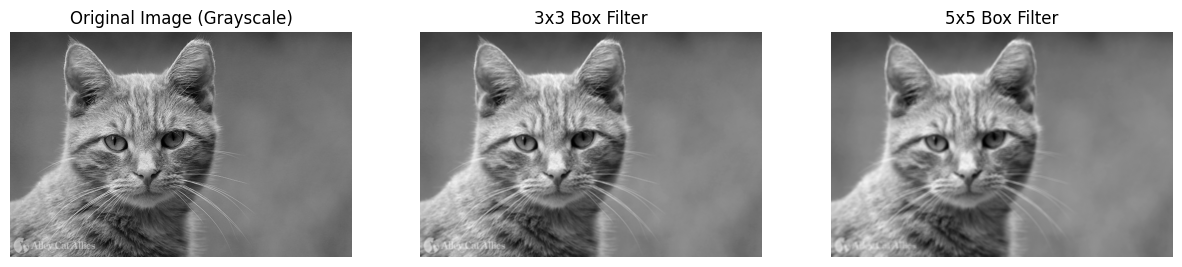

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the uploaded image
image_path = "/mnt/FELV-cat.jpg"
image = cv2.imread(image_path)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply 3x3 box filter
k3 = np.ones((3, 3), np.float32) / 9
filtered_3x3 = cv2.filter2D(gray_image, -1, k3)

# Apply 5x5 box filter
k5 = np.ones((5, 5), np.float32) / 25
filtered_5x5 = cv2.filter2D(gray_image, -1, k5)

# Display results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title("Original Image (Grayscale)")
axes[0].axis("off")

axes[1].imshow(filtered_3x3, cmap='gray')
axes[1].set_title("3x3 Box Filter")
axes[1].axis("off")

axes[2].imshow(filtered_5x5, cmap='gray')
axes[2].set_title("5x5 Box Filter")
axes[2].axis("off")

plt.show()


3. Obtain and print two-dimensional Gaussian kernels with the following characteristics:<br>
a) $\sigma^2 = 1$, kernel size: 3x3, <br>b) $\sigma^2 = 1.2$, kernel size: 5x5, <br> c) $\sigma^2 = 1.6$, kernel size: 9x9.





In [2]:
import numpy as np

def gkern(l=5, sig=1.):
    """Creates a Gaussian kernel with side length l and a sigma of sig"""
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
    return kernel / np.sum(kernel)  # Normalize the filter to sum to 1

# Obtain and print Gaussian kernels with specified parameters
print("3x3 Gaussian Kernel (σ²=1, σ=1):\n", gkern(3, np.sqrt(1)))
print("\n5x5 Gaussian Kernel (σ²=1.2, σ=1.095):\n", gkern(5, np.sqrt(1.2)))
print("\n9x9 Gaussian Kernel (σ²=1.6, σ=1.265):\n", gkern(9, np.sqrt(1.6)))





3x3 Gaussian Kernel (σ²=1, σ=1):
 [[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]

5x5 Gaussian Kernel (σ²=1.2, σ=1.095):
 [[0.00490724 0.01712794 0.02598132 0.01712794 0.00490724]
 [0.01712794 0.05978239 0.09068371 0.05978239 0.01712794]
 [0.02598132 0.09068371 0.13755784 0.09068371 0.02598132]
 [0.01712794 0.05978239 0.09068371 0.05978239 0.01712794]
 [0.00490724 0.01712794 0.02598132 0.01712794 0.00490724]]

9x9 Gaussian Kernel (σ²=1.6, σ=1.265):
 [[4.51839622e-06 4.02720272e-05 1.92127096e-04 4.90613728e-04
  6.70589458e-04 4.90613728e-04 1.92127096e-04 4.02720272e-05
  4.51839622e-06]
 [4.02720272e-05 3.58940671e-04 1.71241017e-03 4.37279256e-03
  5.97689878e-03 4.37279256e-03 1.71241017e-03 3.58940671e-04
  4.02720272e-05]
 [1.92127096e-04 1.71241017e-03 8.16945202e-03 2.08614265e-02
  2.85141893e-02 2.08614265e-02 8.16945202e-03 1.71241017e-03
  1.92127096e-04]
 [4.90613728e-04 4.37279256e-03 2.08614265e-02 5.32715189e

4. Apply the three
Gaussian kernels obtained previously on your uploaded image. show your filter results. Discuss the differences of
Gaussian operations with different sigmas. Also, compare your results with question 2: what are the differences between these ﬁlters, what do you observe ? Which ﬁltering is the most eﬀective in which images ? Why ?

Each Gaussian filter has its own tradeoffs, Small kernels/small σ values remove minor noise while keeping detail. Larger kernels/larger σ values provide stronger smoothing at the cost of blurring fine details. Thus, the most effective filtering depends on the image characteristics and the specific goal noise reduction vs. detail preservation. In scenarios where the image is heavily noisy and detail loss is acceptable, a larger Gaussian filter like the 9×9 may be preferred. Conversely, if maintaining fine details is crucial, a smaller filter like the 3×3 is more appropriate.

By comparing these Gaussian filters with other filters as in Question 2, you can appreciate that the Gaussian approach offers a more natural and edge-aware smoothing process, which often yields visually superior results in many practical image processing tasks.


5. Implement the three steps of Sobel filtering. Apply it to the uploaded image for 3 different thresholds. Show the results on
the screen, and discuss the resulting images.



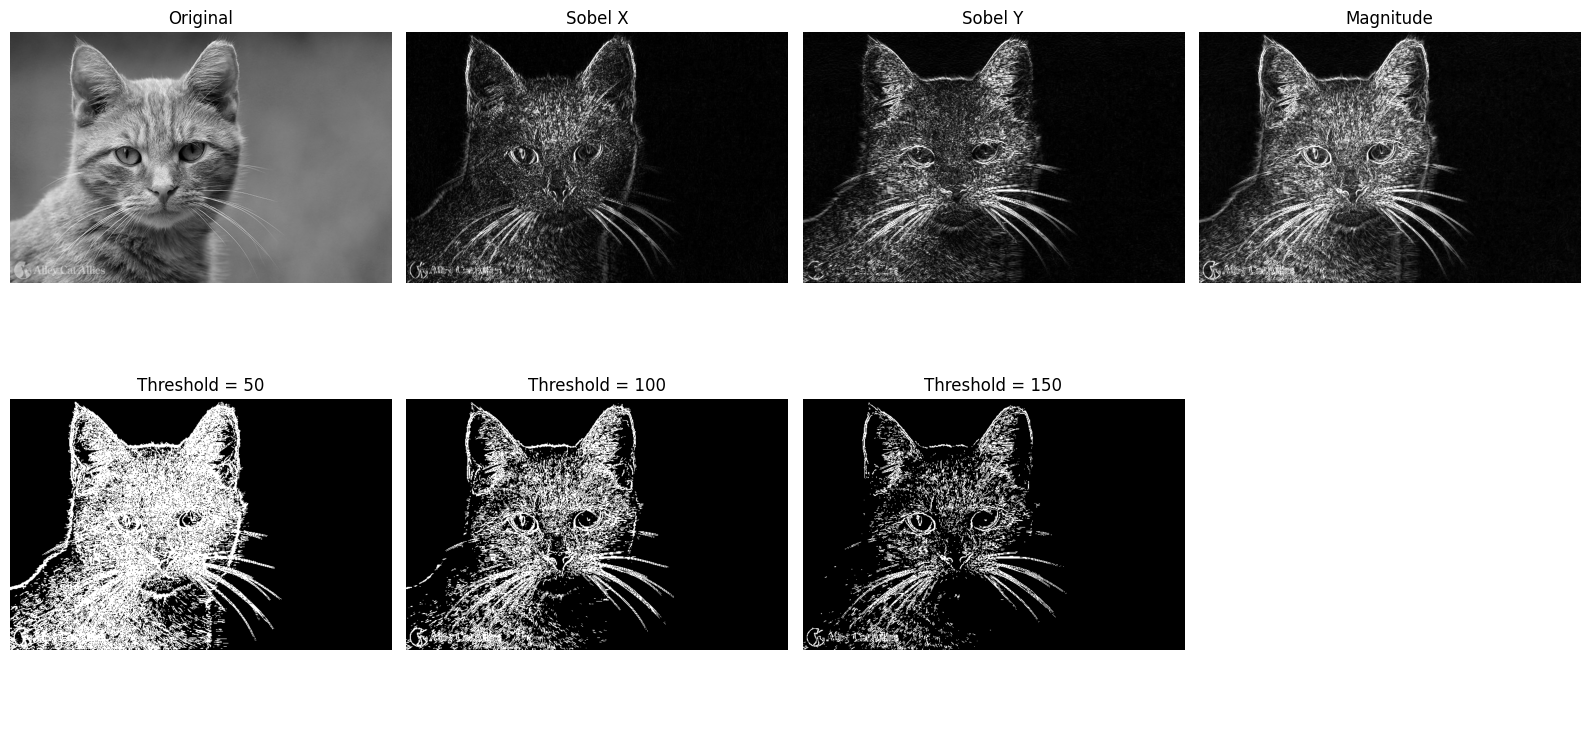

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the image in grayscale
image = cv2.imread('/mnt/FELV-cat.jpg', cv2.IMREAD_GRAYSCALE)
if image is None:
    raise FileNotFoundError("Make sure 'your_cat_image.jpg' exists in the working directory.")

# 2. Define Sobel kernels (3x3)
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float32)

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]], dtype=np.float32)

# 3. Apply Sobel kernels using cv2.filter2D
grad_x = cv2.filter2D(image, cv2.CV_32F, sobel_x)
grad_y = cv2.filter2D(image, cv2.CV_32F, sobel_y)

# 4. Convert gradients to absolute 8-bit images
grad_x_abs = cv2.convertScaleAbs(grad_x)
grad_y_abs = cv2.convertScaleAbs(grad_y)

# 5. Compute the gradient magnitude
grad_x_32f = np.float32(grad_x_abs)
grad_y_32f = np.float32(grad_y_abs)
magnitude = np.sqrt(grad_x_32f**2 + grad_y_32f**2)
magnitude = cv2.convertScaleAbs(magnitude)

# 6. Apply thresholds with 3 different values
thresholds = [50, 100, 150]
thresholded_images = []
for t in thresholds:
    _, thresh_img = cv2.threshold(magnitude, t, 255, cv2.THRESH_BINARY)
    thresholded_images.append((t, thresh_img))

# Prepare all images for display
images = [
    ("Original", image),
    ("Sobel X", grad_x_abs),
    ("Sobel Y", grad_y_abs),
    ("Magnitude", magnitude)
]
# Append thresholded images
for t, thresh_img in thresholded_images:
    images.append((f"Threshold = {t}", thresh_img))

# 7. Create a subplot grid with enough slots (using plt.subplots)
num_images = len(images)
cols = 4  # For example, we choose 4 columns
rows = (num_images + cols - 1) // cols  # compute rows needed

fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))
# If there's only one row, axes may not be a 2D array
if rows == 1:
    axes = np.expand_dims(axes, axis=0)
axes = axes.flatten()

# Plot each image and hide any extra subplots
for idx, (title, img) in enumerate(images):
    axes[idx].imshow(img, cmap='gray')
    axes[idx].set_title(title)
    axes[idx].axis('off')

for j in range(len(images), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Edit your comments here


6. Use canny edge detector incorporated in opencv. Pick two diferent sets of hysteresys thresholds. What can you tell about the effect on the obtained edges.  


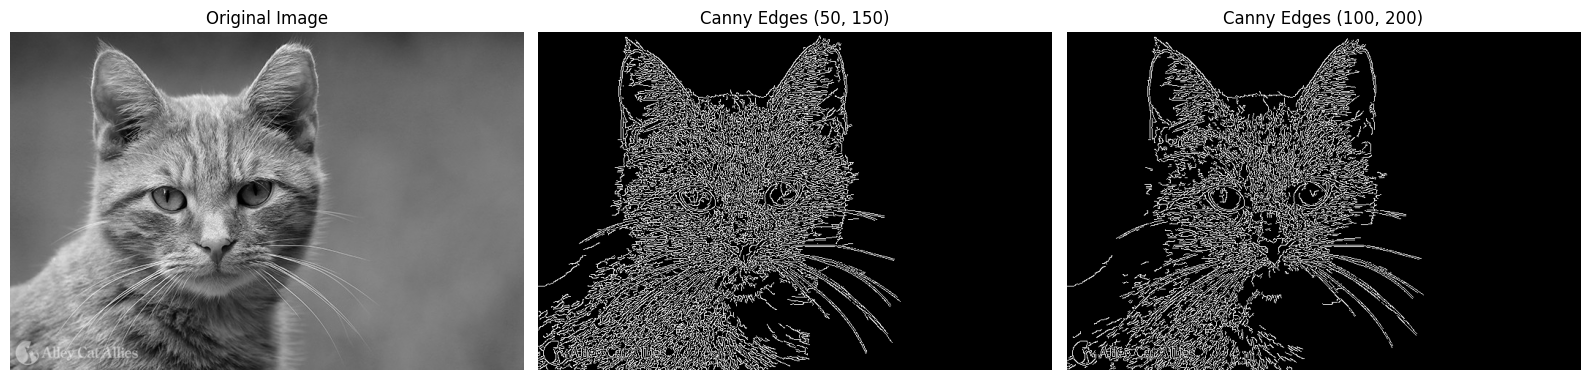

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('/mnt/FELV-cat.jpg', cv2.IMREAD_GRAYSCALE)
if image is None:
    raise FileNotFoundError("Image file not found. Check the path and filename.")

# Apply Canny edge detector with two different threshold pairs
# First pair: lower thresholds, more sensitive (detects more edges, including noise)
edges1 = cv2.Canny(image, threshold1=50, threshold2=150)

# Second pair: higher thresholds, more selective (detects only the strongest edges)
edges2 = cv2.Canny(image, threshold1=100, threshold2=200)

# Display the original and edge-detected images
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(edges1, cmap='gray')
axes[1].set_title("Canny Edges (50, 150)")
axes[1].axis("off")

axes[2].imshow(edges2, cmap='gray')
axes[2].set_title("Canny Edges (100, 200)")
axes[2].axis("off")

plt.tight_layout()
plt.show()



Edit your comments here

Now, you are going to use morphological operations to try to count automatically the number of rice grains from an image.

7. Read image, convert it to gray scale and apply a bilateral filter.
<br>A bilateral filter is a filter that smooth where there is not changes on the gray scale preserving values close to edges. To understand bilateral filters  [Click here](https://machinelearningknowledge.ai/bilateral-filtering-in-python-opencv-with-cv2-bilateralfilter/)


In [7]:
from skimage import io
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = io.imread('https://i.stack.imgur.com/pgWt1.jpg')   #io.imread reads in the format RGB. if we were using opencv native read, the read with  be already BGR and the following conversion wouldn't be neccesary
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# utilize cvtColor to convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# display the gray scale image
cv2_imshow(gray)

# apply a bilateral filter. Adjust the value to your convenience
diameter_neighborhood= 11
sigma_color_space = 17
sigma_spatial_space = 5
gray = cv2.bilateralFilter(gray, diameter_neighborhood, sigma_color_space, sigma_spatial_space)
cv2_imshow(gray)




HTTPError: HTTP Error 403: Forbidden

8. Compute the edges of the previous image with a Canny filter. Adjust the thresholds of the canny filter to obtain the best edge you can.

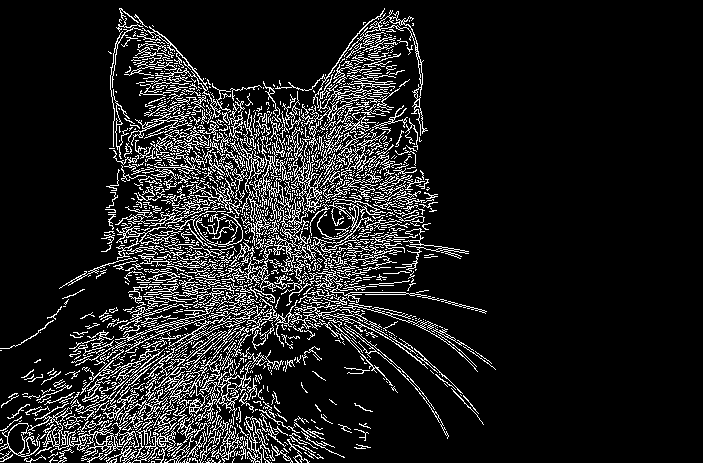

In [8]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image in grayscale
gray = cv2.imread('/mnt/FELV-cat.jpg', cv2.IMREAD_GRAYSCALE)
if gray is None:
    raise FileNotFoundError("The image '/mnt/FELV-cat.jpg' was not found.")

# Adjust thresholds to get the best edge detection
# (Threshold values can be fine-tuned based on the image characteristics)
threshold1 = 70
threshold2 = 140

# Compute edges using Canny
edges = cv2.Canny(gray, threshold1, threshold2)

# Display the resulting edges
cv2_imshow(edges)



9. Apply a closing operation to the edges of the image. Experiment with different kernel sizes (3,5,9).


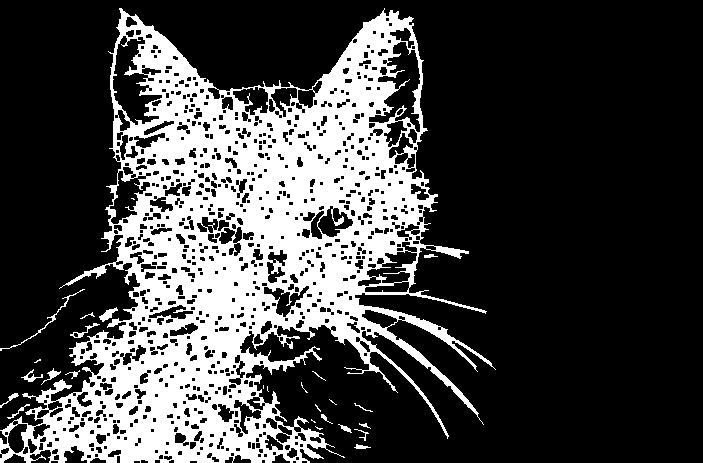

In [9]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closed)

10. Find the countours (curve joining all the continuous points (along the boundary)) of the object, display the grains you found in the image. Explanation of contours is [here](https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html).
<br>a) what the values of the variable (array) cnts represents?  <br>b) What the variable "peri" represents?  <br>c) Change the color of the contour to red

A total of 26 grains were found
1


2


3


4


5


6


7


8


9


10


11


12


13


14


15


16


17


18


19


20


21


22


23


24


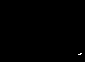

25


26


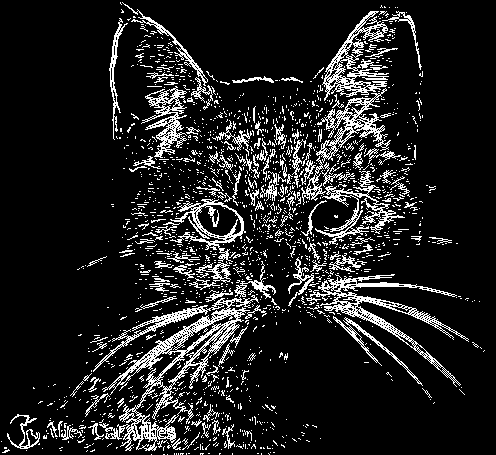

the grains


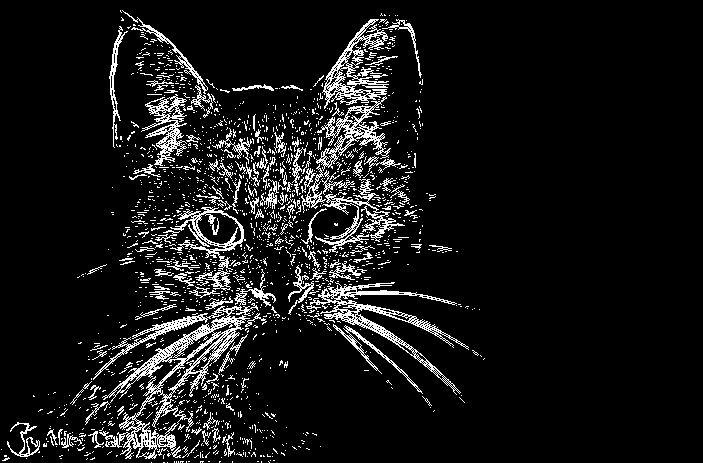

In [10]:
i=0
cnts,heir= cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[-2:]


print("A total of " + str(len(cnts)) + " grains were found")
for c in cnts:
	peri = cv2.arcLength(c, True)

  #an approximation of the contour of the figure
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)

	# Understand what are the parameters of this function
	cv2.drawContours(img, [approx], -1, (0, 255, 0), 2)

  # crop the image
	x,y,w,h =cv2.boundingRect(c)
	i=i+1;
	print(i)
	newImage=img[y:y+h,x:x+w]
	cv2_imshow(newImage)

print("the grains")
cv2_imshow(img)
